# Assignment 2 

In this assignment, you will try to find groups of similar customers in the dataset included in the uploaded folder. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from IPython.display import HTML, display
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import  silhouette_score
from sklearn.cluster import DBSCAN


### 2. Reading the dataset

In [2]:
data = pd.read_csv('CC GENERAL.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [3]:
data = data.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)

### Scale the data 

In [4]:
# scaling 
mms=MinMaxScaler()
data[:] = mms.fit_transform(data[:])

In [5]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.008210,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


## 4. Finding groups

### Approach 1 [ 1.5 + 3.5 marks ] 

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

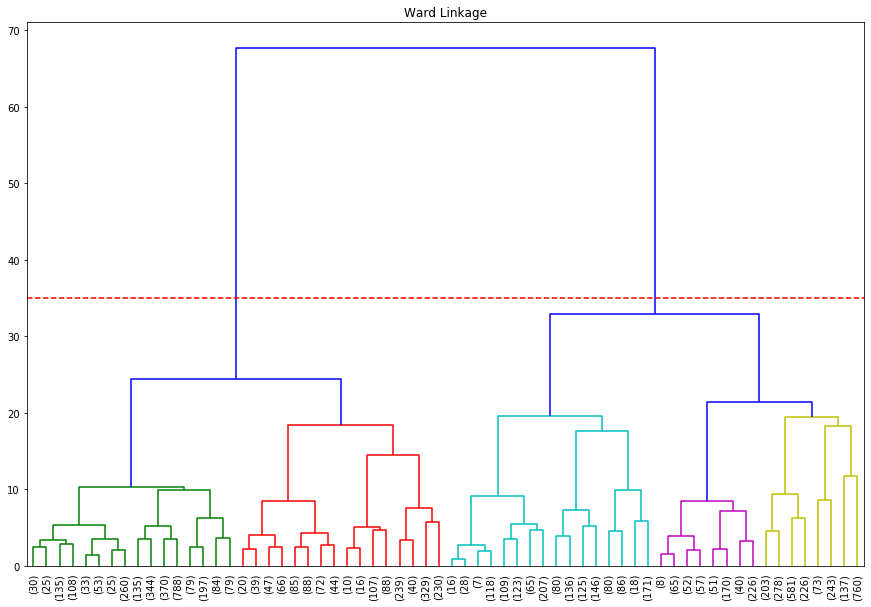

In [6]:
#Ward
Z=sch.linkage(data,method='ward')
plt.figure(figsize=(15,10))
sch.dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=35, color='r', linestyle='--')
plt.title("Ward Linkage")
plt.show()

###### As per above dendogram for Ward Linkage, the optimal no. of clusters is 2. 

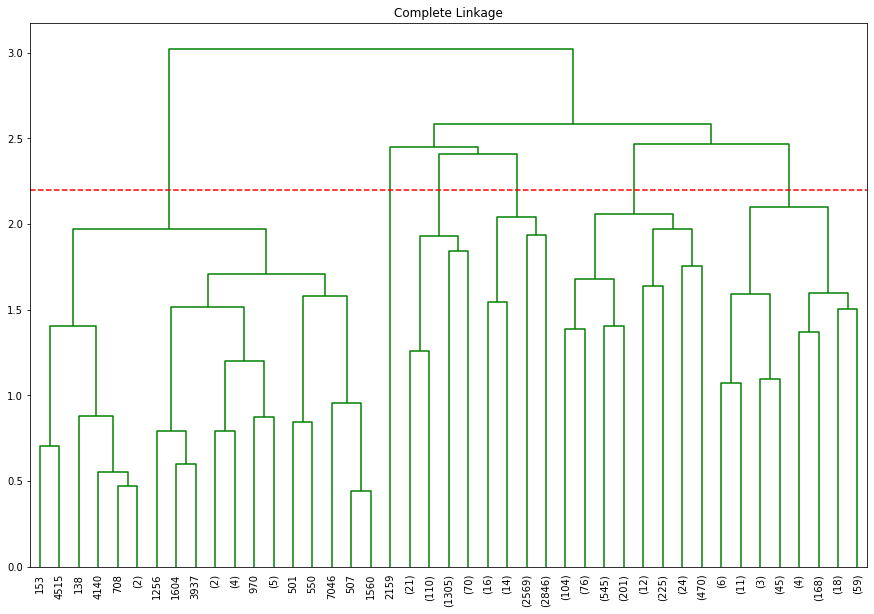

In [7]:
#Complete
Z=sch.linkage(data,method='complete')
plt.figure(figsize=(15,10))
sch.dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=2.2, color='r', linestyle='--')
plt.title("Complete Linkage")
plt.show() 

###### As per above dendogram for Complete Linkage, the optimal no. of clusters is 6. 

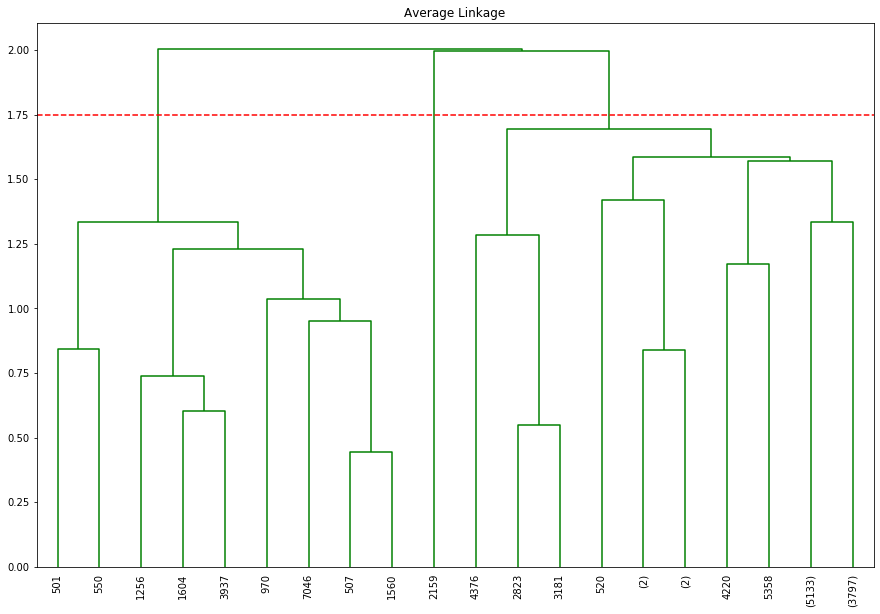

In [8]:
#Average
Z=sch.linkage(data,method='average')
plt.figure(figsize=(15,10))
sch.dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=1.75, color='r', linestyle='--')
plt.title("Average Linkage")
plt.show() 

###### As per above dendogram for Average Linkage, the optimal no. of clusters is 3. 

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.  

In [9]:
# clustering (hint: Use AgglomerativeClustering imported above)
options = { 'ward': 2, 'complete': 6, 'average': 3 }
results = []
centroids = []
for linkage in options.keys(): 
    no_of_clusters = options[linkage] 
    euclidean_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='euclidean', linkage=linkage)
    euclidean_model.fit(data)
    euclidean_labels = euclidean_model.labels_
    silhouette_avg = silhouette_score(data, euclidean_labels)
    
    y_predict = euclidean_model.fit_predict(data)
    clf = NearestCentroid()
    clf.fit(data, y_predict)
 
    for idx, centroid in enumerate(clf.centroids_):
        centroids.append( ((linkage,'euclidean', idx+1) +  tuple(centroid) ) )
   
    results.append((linkage, no_of_clusters, 'euclidean', silhouette_avg ))
    
    if(linkage != 'ward') :
        manhattan_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='manhattan', linkage=linkage)
        manhattan_model.fit(data)
        manhattan_labels = manhattan_model.labels_
        silhouette_avg = silhouette_score(data, manhattan_labels)
        
        y_predict = manhattan_model.fit_predict(data)
        clf = NearestCentroid()
        clf.fit(data, y_predict)
    
        for idx, centroid in enumerate(clf.centroids_):
            centroids.append( ((linkage,'manhattan', idx+1) +  tuple(centroid) ) )
 
        results.append((linkage, no_of_clusters,  'manhattan', silhouette_avg ))
        
        cosine_model = AgglomerativeClustering(n_clusters=no_of_clusters, affinity='cosine', linkage=linkage)
        cosine_model.fit(data)
        cosine_labels = cosine_model.labels_
        silhouette_avg = silhouette_score(data, cosine_labels)
        
        y_predict = cosine_model.fit_predict(data)
        clf = NearestCentroid()
        clf.fit(data, y_predict)
        
        for idx, centroid in enumerate(clf.centroids_):
            centroids.append( ((linkage,'cosine', idx+1) +  tuple(centroid) ) )
  
        results.append((linkage, no_of_clusters,  'cosine', silhouette_avg ))

#### Cluster Means

In [10]:
df = pd.DataFrame(centroids, columns = ['Linkage','Distance Measure','Cluster Number'] + list(data.columns))
df.reset_index(drop=True, inplace=True) 
display( df )  

,Linkage,Distance Measure,Cluster Number,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,ward,euclidean,1,0.070976,0.926940,0.034167,0.022962,0.032892,0.011886,0.835361,0.322494,0.660262,0.052779,0.015932,0.073201,0.156960,0.037943,0.011091,0.231945,0.929456
1,ward,euclidean,2,0.094433,0.822710,0.005397,0.005277,0.002208,0.030522,0.111365,0.070601,0.039481,0.131088,0.037926,0.005815,0.138984,0.030025,0.011579,0.067780,0.908675
2,complete,euclidean,1,0.041962,0.892862,0.015579,0.009319,0.017076,0.016232,0.823566,0.196130,0.611225,0.094890,0.020144,0.032657,0.079559,0.012098,0.005305,0.288033,0.221868
3,complete,euclidean,2,0.039111,0.944533,0.038683,0.028947,0.031889,0.006609,0.888655,0.470962,0.589165,0.029616,0.008498,0.076437,0.176611,0.040989,0.005023,0.530735,0.976564
4,complete,euclidean,3,0.087026,0.839431,0.007472,0.006262,0.004953,0.025800,0.215539,0.092858,0.124512,0.112332,0.032437,0.011702,0.135134,0.028154,0.011296,0.064741,0.924304
5,complete,euclidean,4,0.392988,0.989562,0.491768,0.456733,0.244405,0.019818,0.974691,0.887654,0.825926,0.057613,0.025896,0.393027,0.559760,0.456179,0.045356,0.438973,0.987654
6,complete,euclidean,5,0.572650,1.000000,0.008808,0.003275,0.013264,1.000000,0.583333,0.250000,0.500000,0.666667,1.000000,0.058659,0.652755,0.769863,0.070598,0.000000,1.000000
7,complete,euclidean,6,0.114381,0.934730,0.039927,0.021753,0.047629,0.018455,0.967482,0.292298,0.924817,0.075445,0.025016,0.103884,0.171931,0.044965,0.018962,0.027562,0.983842
8,complete,manhattan,1,0.237970,0.709091,0.283484,0.338267,0.005055,0.342399,0.400000,0.316667,0.116667,0.277778,0.289431,0.058659,0.539900,0.754354,0.066930,0.360000,1.000000
9,complete,manhattan,2,0.093446,0.830238,0.005576,0.004445,0.004107,0.029972,0.159206,0.060966,0.098145,0.130725,0.038074,0.008179,0.138002,0.029477,0.012015,0.061341,0.908552


#### Cluster Quality

In [11]:
df = pd.DataFrame(results, columns =['Linkage', 'No. of Clusters', 'Distance Measure', 'Silhouette Score']) 
df.reset_index(drop=True, inplace=True) 
display( df )

,Linkage,No. of Clusters,Distance Measure,Silhouette Score
0,ward,2,euclidean,0.356759
1,complete,6,euclidean,0.307609
2,complete,6,manhattan,0.244753
3,complete,6,cosine,0.215399
4,average,3,euclidean,0.430040
5,average,3,manhattan,0.454188
6,average,3,cosine,0.190959


###### From above table, we can conclude that Euclidean distance performs better for Ward and Complete linkages. Manhattan distance performs better for Average linkage.

### Approach 2 [ 3 marks] 
Solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

In [12]:
# clustering 
results = []
for (eps,min_pts) in ((0.1,5), (0.5, 3), (0.8, 5)):
    db = DBSCAN(eps=eps, min_samples=min_pts).fit(data)
     # clustering 
    labels = db.labels_
    core_samples = np.zeros_like(labels, dtype = bool)
    core_samples[db.core_sample_indices_] = True
    core_samples_count = len(db.core_sample_indices_)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_count = list(labels).count(-1)
     
    results.append((eps, min_pts, core_samples_count, noise_count, n_clusters, silhouette_score(data, labels) ))

df = pd.DataFrame(results, columns =['EPS', 'Min Samples', 'Core Samples', 'Noise', 'No. of Clusters' , 'Silhouette Score']) 
df.reset_index(drop=True, inplace=True) 
display( df )

,EPS,Min Samples,Core Samples,Noise,No. of Clusters,Silhouette Score
0,0.1,5,3310,5032,62,-0.480132
1,0.5,3,8887,45,1,0.348658
2,0.8,5,8938,6,1,0.420973


<b>Conclusion:</b> As per above table, we can conclude that EPS <b>0.8</b> and Min Samples <b>5</b> performs better with DBSCAN Method and it results in <b>1</b> cluster

## 5. Visualization [ 2 marks ] 
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

In [13]:
# visualization - reduce to two dimensions using PCA and make a scatterplot 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 


### Hierarchical Clustering

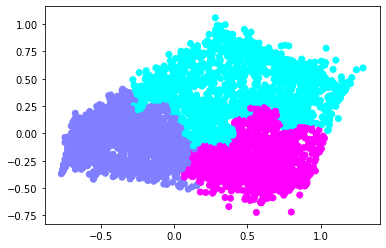

In [21]:
#Hierarchical Clustering
plt.scatter(X_principal['P1'], X_principal['P2'],c= AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average').fit_predict(X_principal), cmap =plt.cm.cool) 
plt.show() 

### DBScan Clustering

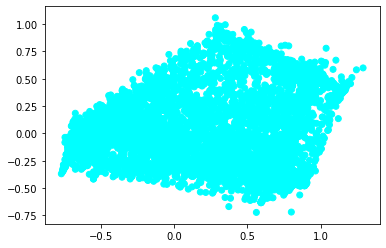

In [22]:
#DBScan
plt.scatter(X_principal['P1'], X_principal['P2'],c =DBSCAN(eps=0.8, min_samples=5).fit_predict(X_principal), cmap =plt.cm.cool) 
plt.show() 

In [16]:
print('COMPLETE')

COMPLETE
